# Stochastic Gradient Descent (SGD) for handwritten images digit recognition

This notebook is a application of SDG algorithm for handwritten digit recognition.

In [1]:
! [ -e /content ] && pip install -Uqq fastbook

import fastbook
fastbook.setup_book()

from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')
     


In [2]:
# Using MINST dataset for handwriting digits recognition
path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path
path.ls()

(#3) [Path('labels.csv'),Path('train'),Path('valid')]

In [3]:
(path/'train').ls()

(#2) [Path('train/3'),Path('train/7')]

In [4]:
# Checking numbers 3 and 7
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes
     

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png'),Path('train/3/10093.png'),Path('train/3/10097.png'),Path('train/3/10099.png'),Path('train/3/10116.png'),Path('train/3/10125.png'),Path('train/3/10137.png'),Path('train/3/10141.png'),Path('train/3/10144.png'),Path('train/3/10155.png'),Path('train/3/10161.png')...]

In [5]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [6]:
# as numpy array
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [7]:
# as pytorch tensor
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [8]:
#hide_output
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [9]:
im3_t.shape

torch.Size([28, 28])

In [10]:
#### Parentesis experimento Como se podria averiguar que una imagen pertenece a cierto num.
"""
Teoría:
Pensaba que tal vez sumando los valores de cada columna deberia retornar un num. caracterísitico.
Luego comparando las sumas de cada columna, estas deberían ser similares en tanto pertenezcan al
mismo dígito.
"""

#suma de columnas
cols_sum = 0
for col in range(im3_t.shape[1]):
    _sum = im3_t[:,col].sum()
    print(f'col: {col} = {_sum}')
    cols_sum += _sum
print(f'Suma de columnas: {cols_sum}')

col: 0 = 0
col: 1 = 0
col: 2 = 0
col: 3 = 0
col: 4 = 0
col: 5 = 203
col: 6 = 849
col: 7 = 1191
col: 8 = 1212
col: 9 = 1081
col: 10 = 1484
col: 11 = 1669
col: 12 = 1968
col: 13 = 2005
col: 14 = 2586
col: 15 = 3180
col: 16 = 3189
col: 17 = 3377
col: 18 = 2700
col: 19 = 1383
col: 20 = 388
col: 21 = 0
col: 22 = 0
col: 23 = 0
col: 24 = 0
col: 25 = 0
col: 26 = 0
col: 27 = 0
Suma de columnas: 28465


In [11]:
# suma de columnas de algunos numeros
for num in range(0,20):
    cols_sum = 0
    im3_path = threes[num]
    im3 = Image.open(im3_path)
    display(im3)
    im3_t = tensor(im3)
    for col in range(im3_t.shape[1]):
        _sum = im3_t[:,col].sum()
        #print(f'col: {col} = {_sum}')
        cols_sum += _sum
    print(f'Suma de columnas: {cols_sum}')

Suma de columnas: 28548


Suma de columnas: 28465


Suma de columnas: 28676


Suma de columnas: 35159


Suma de columnas: 31570


Suma de columnas: 41528


Suma de columnas: 33532


Suma de columnas: 27725


Suma de columnas: 34048


Suma de columnas: 36878


Suma de columnas: 26658


Suma de columnas: 25526


Suma de columnas: 24818


Suma de columnas: 18321


Suma de columnas: 28296


Suma de columnas: 19497


Suma de columnas: 24766


Suma de columnas: 19980


Suma de columnas: 33598


Suma de columnas: 26325


In [12]:
# suma de columnas de algunos numeros 7
for num in range(0,20):
    cols_sum = 0
    im3_path = sevens[num]
    im3 = Image.open(im3_path)
    display(im3)
    im3_t = tensor(im3)
    for col in range(im3_t.shape[1]):
        _sum = im3_t[:,col].sum()
        #print(f'col: {col} = {_sum}')
        cols_sum += _sum
    print(f'Suma de columnas: {cols_sum}')

Suma de columnas: 30526


Suma de columnas: 31417


Suma de columnas: 27982


Suma de columnas: 21637


Suma de columnas: 24615


Suma de columnas: 17429


Suma de columnas: 34645


Suma de columnas: 16880


Suma de columnas: 17220


Suma de columnas: 29631


Suma de columnas: 16704


Suma de columnas: 18763


Suma de columnas: 23444


Suma de columnas: 16644


Suma de columnas: 26419


Suma de columnas: 15986


Suma de columnas: 21483


Suma de columnas: 20393


Suma de columnas: 38271


Suma de columnas: 19896


In [13]:
# Semi conclusión la suma de columnas varía mucho dependiendo de la forma del dígito. Pueden haber números
# 7 que parecen 1 o sietes que una rayita al medio que hacen variar la representación. Por tanto
# la suma de columnas no parece que arroja un número muy representativo del dígito.

### Testing approach "getting average of pixel values"

In [14]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)

(6131, 6265)

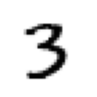

In [15]:
show_image(three_tensors[1]);

In [16]:
# stacking in a rank-3 tensor to combine all images in the list into a single three-dimensional tensor.
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [17]:
#tensor's rank
len(stacked_threes.shape)

3

In [18]:
stacked_threes.ndim

3

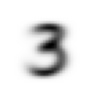

In [19]:
# getting the means of all number threes, should this be the perfect three?
mean3 = stacked_threes.mean(0)
show_image(mean3);

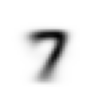

In [20]:
# same with sevens
mean7 = stacked_sevens.mean(0)
show_image(mean7);

different digits.


<Axes: >

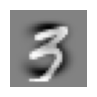

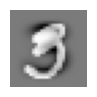

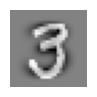

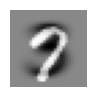

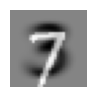

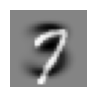

In [21]:
# Now how about trying to check how different is a digit from the "ideal" one
show_image(mean3 - stacked_threes[7])
show_image(mean3 - stacked_threes[9])
show_image(mean3 - stacked_threes[2])
print("different digits.")
show_image(mean3 - stacked_sevens[3])
show_image(mean3 - stacked_sevens[5])
show_image(mean3 - stacked_sevens[7])

In [22]:
print((mean3 - stacked_threes[7]).mean())
print((mean3 - stacked_threes[9]).mean())
print((mean3 - stacked_threes[2]).mean())
print("Different digits:")
print((mean3 - stacked_sevens[3]).mean())
print((mean3 - stacked_sevens[5]).mean())
print((mean3 - stacked_sevens[7]).mean())

tensor(0.0028)
tensor(-0.0429)
tensor(-0.0019)
Different digits:
tensor(0.0333)
tensor(0.0544)
tensor(0.0571)


In [23]:
(mean7 - stacked_threes[7]).mean()

tensor(-0.0242)

We can try soething like:

- Mean of absoulte value of differences or *L1 norm*
- RMSE *root mean squared error* or *L2 norm* (This penalizes bigger mistakes more heavely than L1, and is more lenient with small mistakes)

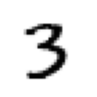

In [24]:
a_3 = stacked_threes[1]
show_image(a_3);

In [25]:
# First lets try the absolute value of differences
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs,dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [26]:
# Now lets try the RMSE
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In both cases, the distance between our 3 and the "ideal" 3 is less than the distance to the ideal 7. So our simple model will give the right prediction in this case.

In [27]:
# Using torch.nn.functional to calculate both of thse loss functions. They are already imported as F in fastai
F.l1_loss(a_3.float(),mean7), F.mse_loss(a_3,mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

Using the `valid` directory which contains a validation dataset with images labeled.

In [28]:
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In order to determine if an arbitrary image is a three or seven given the "ideals" we obtained from getting means. we will need function that will give us a notion of *distance* for a given digit image and the ideal one.

In [29]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, mean3)

tensor(0.1114)

> Previous function `mean((-1,-2))` represents the mean of every 28x28 matrix. As the tensor was stacked then we have 1010 total images of 28x28. `mean(-1)` would represent the mean of the columns of every digit image, but in this case we want rows and columns of every digit image. That's why we pass the tuple `(-1,-2)` to the `mean` function. In other words `(-1,-2)` would refer to the **last 2 axes** of the tensor.

In [30]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1280, 0.1623, 0.1242,  ..., 0.1508, 0.1263, 0.1260]),
 torch.Size([1010]))

In [31]:
### - playing with shapes a little
(valid_3_tens - mean3).abs().mean((-1)).shape

torch.Size([1010, 28])

In [32]:
(valid_3_tens - mean3).abs().mean((-1,-2)).shape

torch.Size([1010])

In [33]:
mean3.shape
### - end playing

torch.Size([28, 28])

To check if a digit image is a three, we can calculate the `minst_distance` using the *mean3* —ideal 3— and any digit image.
We do the same but using the *mean7* —ideal 7— then compare. If the distance using *mean3* is less than using *mean7* then it is a three.

In [34]:
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)

In [35]:
# lets test it
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [36]:
# applying the whole valid 3 tensor, causes pytorch automatically broadcast and thanks to this we can know if
# every image would be a three or seven
is_3(valid_3_tens)

tensor([ True,  True,  True,  ..., False,  True,  True])

In [37]:
# Calculating the accuracy for each 3s and 7s using the average.
accuracy_3s =      is_3(valid_3_tens).float() .mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

more than 90% of accuracy but 3 and 7 are similar digits, and we are only testing with two combinations of all 10 digits, we might need some real learning. Something that modify itself and improve its performance.

## Applying Stochastic Gradient Descent (SGD)

This helps to create a model by adjusting some initial weights in a loop. Concretely:

1. Initialize the weights.
2. For each image, use these weights to **predict** whether it appears to be a 3 or a 7.
3. Based on these predictions, calculate how good the model is (its *loss*).
4. Calculate the **gradient**, which measures for each weight, how changing that weight would change the loss
5. Step (that is, change) all the weights based on that calculation.
6. Go back to the step 2, and *repeat* the process.
7. Iterate until you decide to stop the training process (for instance, because the model is good enough or you don't want to wait any longer).


In [38]:
# We can use graphviz to create some diagramas (optional)
!pip install graphviz

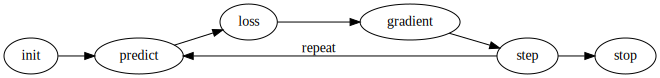

In [39]:
#import graphviz as gv
from fastbook import *
#id gradient_descent
#caption The gradient descent process
#alt Graph showing the steps for Gradient Descent
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

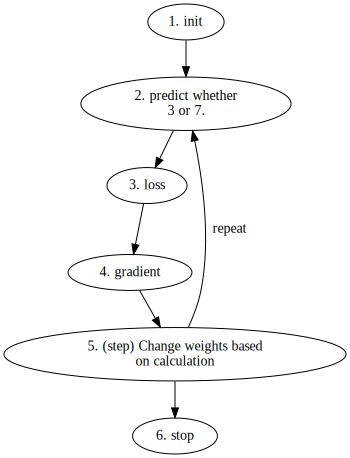

In [40]:
import graphviz
dot_source = '''
digraph G {
    // Define nodes with specific labels
    init [label="1. init"];
    predict [label="2. predict whether\n3 or 7."];
    loss [label="3. loss"];
    gradient [label="4. gradient"];
    step [label="5. (step) Change weights based\n on calculation"];
    stop [label="6. stop"];

    // Define edges (connections)
    init -> predict;
    predict -> loss;
    loss -> gradient;
    gradient -> step;
    step -> stop;

    // Define the repeat edge with its own label
    step -> predict [label="repeat"];
}
'''
# Create a Source object from the DOT string
# The object itself, when on the last line of a cell, will render automatically
graph = graphviz.Source(dot_source)

# Display the graph in the notebook
# This is often implicit if 'graph' is the last line of the cell, but 'display(graph)' works explicitly too
display(graph)

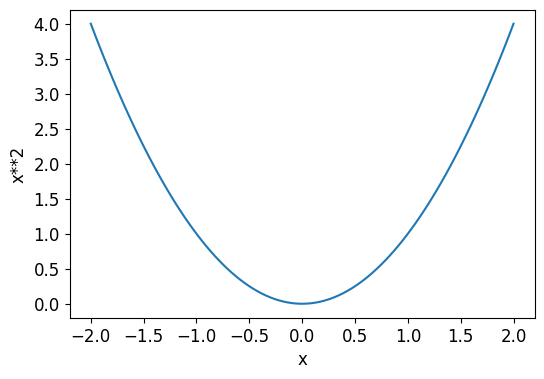

In [41]:
### - playing with graphs
# doing some graphs to understand better the loss function
def f(x): 
    return x**2
plot_function(f,'x', 'x**2')

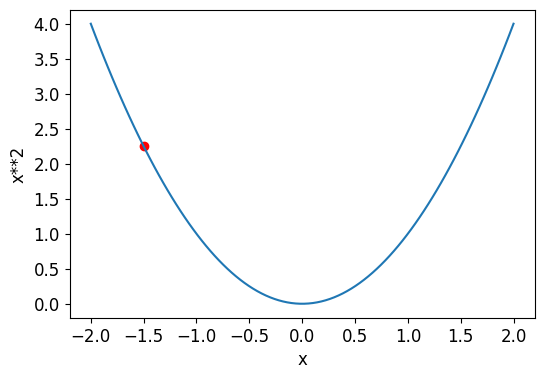

In [42]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red');

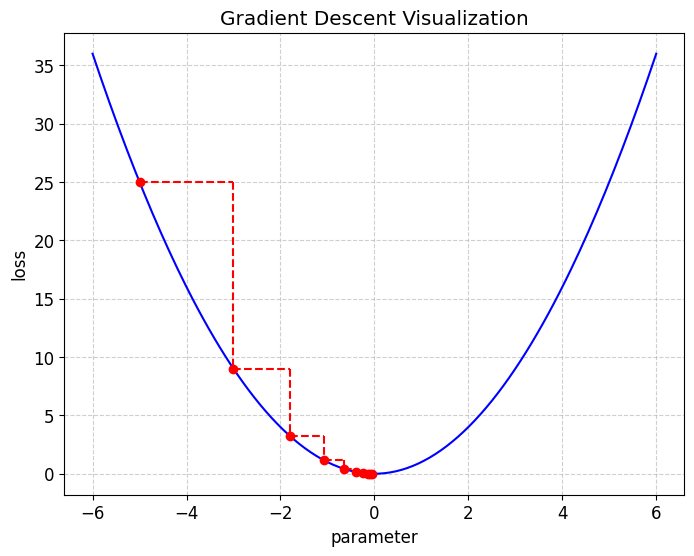

In [43]:
# This is a small visualization of the process of calculating the gradient and how 
# this decreases the loss

import numpy as np
import matplotlib.pyplot as plt

# This magic command ensures plots are displayed correctly in a notebook
%matplotlib inline 

# --- 1. Define the Loss Function (Parabola) ---
# We use a simple quadratic function: f(w) = w^2
def loss_function(w):
    return w**2

# Define the derivative of the loss function (for the gradient descent step)
def gradient(w):
    return 2 * w

# --- 2. Implement Gradient Descent Steps ---

# Initial parameter guess and learning rate
initial_parameter = -5.0
learning_rate = 0.2 # Adjust this rate to change the step sizes

# Store the history of parameters and loss values
parameters_history = [initial_parameter]
loss_history = [loss_function(initial_parameter)]

# Run gradient descent for a few steps
n_steps = 9
current_parameter = initial_parameter

for _ in range(n_steps):
    grad = gradient(current_parameter)
    # Update rule: move in the opposite direction of the gradient
    current_parameter = current_parameter - learning_rate * grad
    
    parameters_history.append(current_parameter)
    loss_history.append(loss_function(current_parameter))

# --- 3. Plot the visualization using Matplotlib ---

# Generate points for the smooth curve
w_values = np.linspace(-6, 6, 200)
loss_values = loss_function(w_values)

plt.figure(figsize=(8, 6))
plt.plot(w_values, loss_values, label='Loss Function', color='blue')
plt.title('Gradient Descent Visualization')
plt.xlabel('parameter')
plt.ylabel('loss')
plt.grid(True, linestyle='--', alpha=0.6)

# Plot the steps (red dashed lines)
for i in range(len(parameters_history) - 1):
    w1, L1 = parameters_history[i], loss_history[i]
    w2, L2 = parameters_history[i+1], loss_history[i+1]
    
    # Horizontal line segment of the step
    plt.plot([w1, w2], [L1, L1], 'r--', lw=1.5)
    # Vertical dashed line segment (the "descent" part)
    plt.plot([w2, w2], [L1, L2], 'r--', lw=1.5)

# Plot the points at each iteration
plt.scatter(parameters_history, loss_history, color='red', zorder=5)

plt.show()

### - end playing

### Calculating gradients

When calculating gradients we use calculus, it helps to determine whether the loss will go up or down when adjusting the parameters up or down. In other words the gradient will tell use how much we have to change each weight to improve the model.

> The *derivative* of a function from calculus tells, how much a change in its parameters will change its result.

The gradient is defined as *rise/run*, that is, the change in the value of the function, devided by the change in the value of the parameter. When we know how our function will change, then we knoe what we need to do to make it smaller. Calculus provides us with a computational shortcut, the derivative, which lets us directly calculate the gradients of our functions.

> Pytorch is able to compute the derivative of nearly any function very fast!

In [44]:
# example of getting the gradient a function from a tensor of params

time = torch.arange(0, 20).float()
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

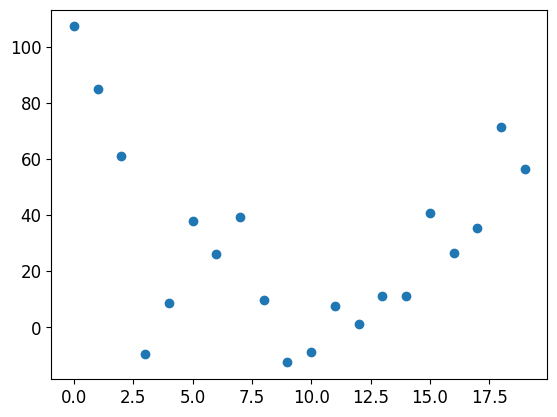

In [45]:
speed = torch.randn(20)*20 + 0.75*(time-9.5)**2 + 1
plt.scatter(time, speed)

In [46]:
# first we define a function because gradient calculates the change in the value of a function
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

# function to calculate the mean square error
def mse(preds, targets): 
    return ((preds-targets)**2).mean()

# step 1
# Initializes a random tensor and requires_grad() adds a "mark" to params, so pytorch will track their gradients
params = torch.randn(3).requires_grad_()

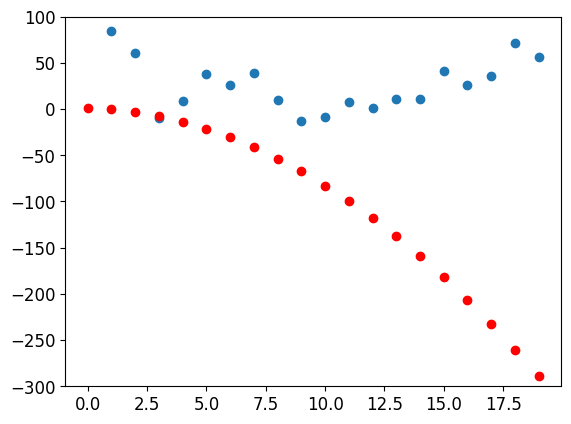

In [47]:
# step 2 . calculate the predictions
preds = f(time, params)


def show_preds(preds, ax=None):
    """ Function to see how close the predictions are to the targets"""
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

show_preds(preds)

In [48]:
# step 3. Calculate the loss
loss = mse(preds, speed)
loss

tensor(26555.2812, grad_fn=<MeanBackward0>)

In [49]:
# step 4. Calculate the gradients
loss.backward()
params.grad

tensor([-53228.6914,  -3433.9912,   -261.2402])

In [50]:
print(params.grad * 1e-5) # simulate a small change
print(params)

tensor([-0.5323, -0.0343, -0.0026])
tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)


In [51]:
# step 5. Step wthe weights
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

> a: Understanding this bit depends on remembering recent history. To calculate the gradients we call `backward` on the `loss`. But this `loss` was itself calculated by `mse`, which in turn took `preds` as an input, which was calculated using `f` taking as an input `params`, which was the object on which we originally called `requires_grad_`—which is the original call that now allows us to call `backward` on `loss`. This **chain** of function calls represents the mathematical composition of functions, which enables PyTorch to use calculus's chain rule under the hood to calculate these gradients.

In [52]:
# check improvements and repeat a few times
preds = f(time,params)
mse(preds, speed)

tensor(6141.2119, grad_fn=<MeanBackward0>)

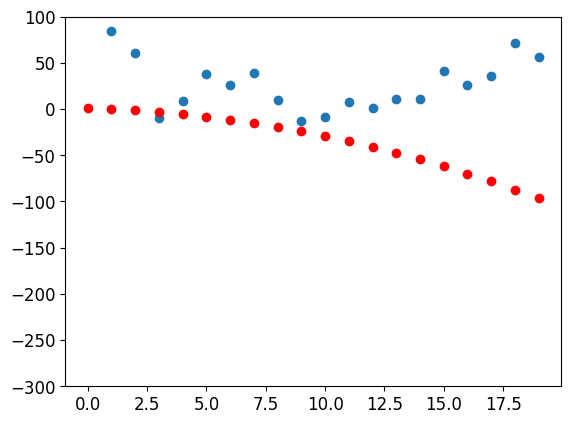

In [53]:
show_preds(preds)

In [54]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

# step 6. repeat the process
for i in range(11): apply_step(params)

6141.2119140625
2278.23681640625
1547.2349853515625
1408.8983154296875
1382.712158203125
1377.748291015625
1376.800537109375
1376.6123046875
1376.5679931640625
1376.5511474609375
1376.539306640625


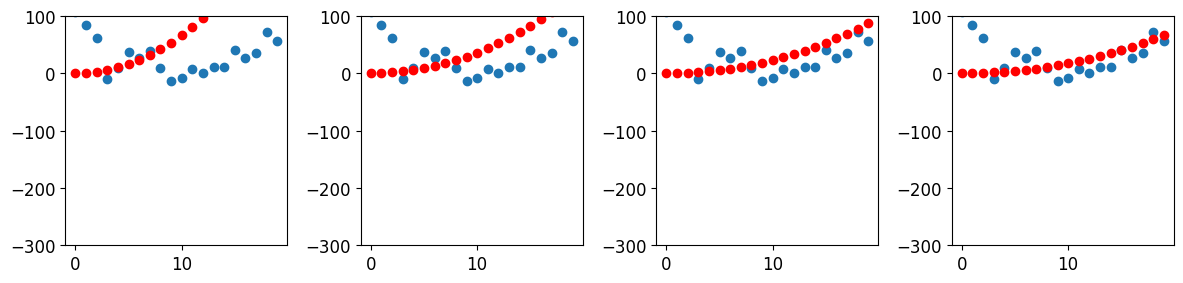

In [55]:
# doing all again showing first 4 steps
_,axs = plt.subplots(1,4,figsize=(12,3))
params = torch.randn(3).requires_grad_()

for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

### The MNIST (dataset of handwritten images) Loss function

Here `x` the independent variables, will be the images. We will concatenate into a single tensor. This can be done using `view` of pytorch, this method changes the shape without changing its contents. `-1` tells "make this axis as big as necessary to fit all the data".

In [56]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
train_x.shape

torch.Size([12396, 784])

In [57]:
# labelling 1 for 3s and 0 for 7s
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
# unsqueeze adds a dimension to the tensor
train_x.shape,train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [58]:
# Here zip function helps to return a Dataset = (image, label)
dset = list(zip(train_x, train_y))
x,y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [59]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

In [60]:
# initalizing the params randomnly and starts to keep track to get the gradient when used in a function
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

weights = init_params((28*28, 1))
bias = init_params(1)
# the biases of a model are b. The weights are the w in the equation w*x + b.

In [61]:
# Calculate the prediction for one image
(train_x[0]*weights.T).sum() + bias

tensor([8.4957], grad_fn=<AddBackward0>)

Instead of looping with python to get the prediction of each image, we can *matrix multiplication* `w*x` and pytorch can do it very fast using the GPU. Matrix multiplication in python is represented with `@`

Cause the equation `batch@weights + bias` is one of the fundamental equations of any newural network.

In [62]:
def linear1(xb): return xb@weights + bias
preds = linear1(train_x)
preds

tensor([[ 8.4957],
        [13.4714],
        [ 8.0717],
        ...,
        [ 6.3964],
        [ 2.9858],
        [-0.0811]], grad_fn=<AddBackward0>)

In [63]:
corrects = (preds>0.0).float() == train_y
corrects

tensor([[ True],
        [ True],
        [ True],
        ...,
        [False],
        [False],
        [ True]])

In [64]:
# mean of the predictions
corrects.float().mean().item()

0.5440464615821838

Lets test how a change in accuracu is for a small change in one of the weights

In [65]:
with torch.no_grad(): weights[0] *= 1.0001

preds = linear1(train_x)
((preds>0.0).float() == train_y).float().mean().item()
     


0.5440464615821838

To improve we need gradients, in otder to calculate gradients we need a *loss* function.

Important to take into account that *accuracy* (the amount of good predictions) is not a good as a loss function because it returns ~0 for small changes in weights.

> Matematically, accuracy is a function that is constant almost everywhere (except at the thershold 0.5), so its derivative is nil almost everywhere and infinity at the thershold. This then gives gradients that are 0 or infinite, which are useless for updating the model.

In [66]:
# This function takes into account predictions and desired targets to get a better loss function
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()

Here `torch.where(condition, input, other)` would be the same as running a list comprehension `input[i] if condition[i] else other[i] for i in range (len(input))]`, except it works for tensors at C/CUDA speed.

In [67]:
#help(torch.where)
# testing a bit
trgts  = tensor([1,0,1])
prds   = tensor([0.9, 0.4, 0.2])
print(torch.where(trgts==1, 1-prds, prds))
mnist_loss(prds,trgts)

tensor([0.1000, 0.4000, 0.8000])


tensor(0.4333)

The problem with the `minst_loss` function is that it assumes the predictions are numbers between 0 and 1, we will need to ensure that this happens. For this the **sigmoid** function is very helpful.

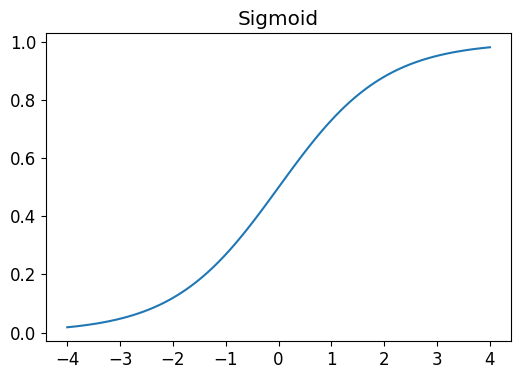

In [68]:
def sigmoid(x): return 1/(1+torch.exp(-x))

# anyway pytorch has an accelerated version of sigmoid. Would be better to use it.
plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)

In [69]:
# we can now update the mnist_loss to apply sigmoid
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

### Minibatch

The idea is to not to calculate the loss for the whole dataset but for a portion of it —a mini batch—, where the number of items is the *batch size*.

The bigger the *batch size*, the more accurate results, but it will take longer and less mini-batches per *epoch*. Choosing a good batch size is one of the decisions to make as deep learning practitioner. Another good reason for using mini-batches is to take advantage of the GPU. These **only perform well** if they have lots of work to do at a time. If you give them too much data to work on at once, they run out of memory!

To shuffle the mini-batches on every epoch we will use Pytorch and fastai class `DataLoader`.

In [70]:
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([ 3, 12,  8, 10,  2]),
 tensor([ 9,  4,  7, 14,  5]),
 tensor([ 1, 13,  0,  6, 11])]

For training a model we need a collection containing independent and dependent variables. This collection that contains tuples of indenpedent and dependent variables is known in Pytorch as `Dataset`.

In [71]:
# example of dataset in Pytorch (notice it has tuples of independent and depedent variables.
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j'),(10, 'k'),(11, 'l'),(12, 'm'),(13, 'n'),(14, 'o'),(15, 'p'),(16, 'q'),(17, 'r'),(18, 's'),(19, 't')...]

In [72]:
# passing a Dataset to a Dataloader, will return mini-batches. These are tuples of tensors with batches
# of dependent and independent variables.
dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

[(tensor([17, 18, 10, 22,  8, 14]), ('r', 's', 'k', 'w', 'i', 'o')),
 (tensor([20, 15,  9, 13, 21, 12]), ('u', 'p', 'j', 'n', 'v', 'm')),
 (tensor([ 7, 25,  6,  5, 11, 23]), ('h', 'z', 'g', 'f', 'l', 'x')),
 (tensor([ 1,  3,  0, 24, 19, 16]), ('b', 'd', 'a', 'y', 't', 'q')),
 (tensor([2, 4]), ('c', 'e'))]

## Applying SGD (Stochastic Gradient Descent) 

Lets focus on the desired gradient descent process:

```python
# gradient descent process
for x, y in dl:
    pred = model(x)
    loss = loss_func(pred, y)
    loss.backward()
    parameters -= parameters.grad * lr
```

In [74]:
# initialize W and b
weights = init_params((28*28,1))
bias = init_params(1)

# A DataLoader can be created from a Dataset
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [77]:
# validation set
valid_dl = DataLoader(valid_dset, batch_size=256)

# mini-batch of size 4 for testing
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [78]:
preds = linear1 (batch)
preds

tensor([[  0.9580],
        [ -9.9279],
        [-14.4214],
        [  8.6673]], grad_fn=<AddBackward0>)

In [79]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.5693, grad_fn=<MeanBackward0>)

In [80]:
# now calculating gradients
loss.backward()
weights.grad.shape,weights.grad.mean(),bias.grad

(torch.Size([784, 1]), tensor(-0.0072), tensor([-0.0502]))

In [81]:
# Putting all in a function
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [82]:
# test the function
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad     

(tensor(-0.0143), tensor([-0.1003]))

In [83]:
# lets call it again
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0215), tensor([-0.1505]))

The gradients are changing because `loss.backward` adds the gradients of `loss` to any gradients that are currently stored. It is needed to set current gradients to 0.

In [84]:
weights.grad.zero_()
bias.grad.zero_();

Note that methods in pytorch whose names end in an underscore **modify** their objects in place. For instance, `bias.zero_()` sets all elements of the tensor `bias` to 0.

In [85]:
def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            # Assigning to the data attribute of a tensor, pytorch will not take the gradient of that step.
            p.data -= p.grad*lr
            p.grad.zero_()

In [86]:
(preds>0.0).float() == train_y[:4]

tensor([[ True],
        [False],
        [False],
        [ True]])

In [87]:
def batch_accuracy(xb, yb):
    """Function to calculate our validation accuracy"""
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()


batch_accuracy(linear1(batch), train_y[:4])

tensor(0.5000)

In [88]:
# putting batches together
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

validate_epoch(linear1)

0.3166

In [89]:
# let's train for one epoch
lr = 1.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.5887

In [90]:
# A 'few' more epochs
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.7074 0.8476 0.9106 0.9355 0.9448 0.9482 0.9511 0.957 0.9624 0.9648 0.9658 0.9672 0.9682 0.9682 0.9692 0.9697 0.9706 0.9711 0.9711 0.9731 

## Creating an optimizer

We can replace the `linear1` function with PyTorch's `nn.Linear` module. `nn.Linear` initializes the parameters and applies the linear function. Also contains *weights* and *biases*.

In [92]:
linear_model = nn.Linear(28*28,1)

In [93]:
# parameters can be accesssed using the parameters method
w,b = linear_model.parameters()
w.shape,b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [94]:
# Now we can create an Optimizer class

class BasicOptim:
    def __init__(self,params,lr):
        """Intializing with parameters and a learning rate"""
        self.params, self.lr = list(params),lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

In [95]:
opt = BasicOptim(linear_model.parameters(), lr)

In [96]:
# The training loop can now be simplified to:

def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

# The validation function doesn't need to change at all
validate_epoch(linear_model)

0.7978

In [97]:
# Function to put the training loop in a function
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')


# Now testing with 20 epochs
train_model(linear_model, 20)

0.4932 0.7749 0.8618 0.9189 0.937 0.9507 0.957 0.9634 0.9658 0.9682 0.9692 0.9717 0.9736 0.9746 0.9761 0.977 0.9775 0.9775 0.978 0.9785 

### Fastai's SDG class

fastai provides the SGD class which, by default, does the same thing as our BasicOptim:


In [98]:
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.4932 0.4932 0.6875 0.8735 0.9199 0.938 0.9517 0.9595 0.9638 0.9658 0.9678 0.9707 0.9721 0.9741 0.9751 0.9756 0.977 0.9775 0.978 0.978 

fastai also provides `Learner.fit`, which we can use instead of `train_model`. To create a Learner we first need to create a `DataLoaders`, by passing in our training and validation `DataLoader`s:


In [100]:
dls = DataLoaders(dl, valid_dl)

Finally to create a `Learner` we need to pass all elements created in this notebook.
- `DataLoaders`
- model
- optimization function (which will be passed the parameters)
- the `loss` function
- Any metrics to print (optional)

In [101]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

# to execute we 'fit'
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.636824,0.503677,0.495584,00:00
1,0.617666,0.153703,0.880765,00:00
2,0.223772,0.196428,0.822375,00:00
3,0.095925,0.109555,0.910206,00:00
4,0.048876,0.079219,0.932287,00:00
5,0.030637,0.063237,0.945535,00:00
6,0.023236,0.053344,0.954858,00:00
7,0.020019,0.046787,0.961236,00:00
8,0.018440,0.042196,0.965162,00:00
9,0.017524,0.038821,0.966634,00:00


## Going beyond linear and defining a simple neural network

We can go neyond the linear classifier and uso something a bit more complex able to handle more tasks, something nonlinear between two linear clasifiers—this is what gives us a neural network.

In [102]:
def simple_net(xb):
    """Simple definition of a basic neural network.
    This has two linear classifiers with `max' function between them
    """
    res = xb@w1 + b1
    res = res.max(tensor(0.0))
    res = res@w2 + b2
    return res

In [103]:
# w1 and w2 are weight tensors, b1 and b2 are bias tensors; that is parameters initialilly 
# randomly initialized.

w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)

The previous network has `w1` with 30 output activations, so `w2` must have 30 input activations to match. So 30 different features. The `res.max(tensor(0.0))` is called a *rectified linear unit* or *ReLU*. In other words *ReLU* replace every negative number with zero. Available in pytorch as `F.relu`

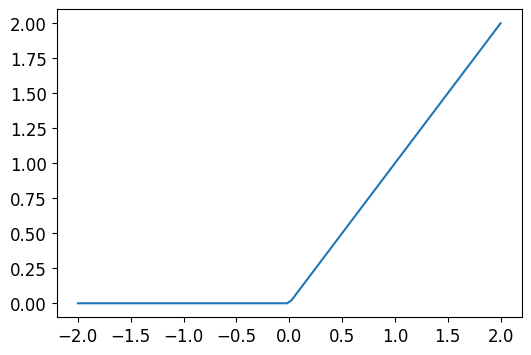

In [104]:
plot_function(F.relu)

In [105]:
# We can replace the previous code with something simpler using PyTorch:

simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

# Trying it out with a Learner
learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

# Execute and do the training --> 'fit'
learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.340932,0.416107,0.505397,00:00
1,0.156382,0.240118,0.792444,00:00
2,0.084884,0.118733,0.912659,00:00
3,0.054765,0.079261,0.939156,00:00
4,0.040993,0.061500,0.953876,00:00
5,0.034059,0.051595,0.963690,00:00
6,0.030135,0.045390,0.966143,00:00
7,0.027620,0.041159,0.967125,00:00
8,0.025826,0.038091,0.969087,00:00
9,0.024443,0.035761,0.971050,00:00


The learning process is recorded in `learn.recorder`, with the table stored in the `values` attribute.

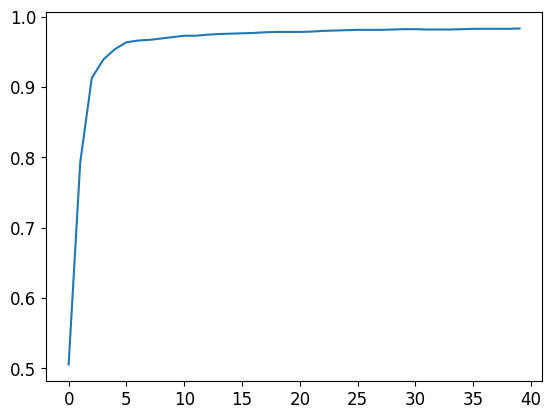

In [107]:
plt.plot(L(learn.recorder.values).itemgot(2));

In [108]:
# Final accuracy
learn.recorder.values[-1][2]

0.983316957950592

At this point we have something that is rather magical:

1. A function that can solve any problem to any level of accuracy (the neural network) given the correct set of parameters
2. A way to find the best set of parameters for any function (stochastic gradient descent)


### Going deeper

Here is what happens when we train an 18-layer model using the same approach we saw in "is it a bird"?

In [109]:

dls = ImageDataLoaders.from_folder(path)
learn = vision_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.073442,0.018651,0.994112,00:31
